In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
games = pd.read_csv('games.csv')
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [3]:
games.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [4]:
games.shape

(81312, 20)

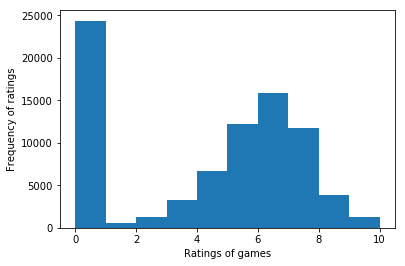

In [5]:
plt.hist(games["average_rating"])
plt.xlabel("Ratings of games")
plt.ylabel("Frequency of ratings")
plt.show()

The histogram looks skewed and is not normally distributed too!

In [6]:
#Print first row of zero ratings
games[games["average_rating"] == 0].iloc[0]

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object

As we can observe, this game had only 1 wisher. So my initial guess is that it was never published. Hence, it has no reviews.

In [7]:
#Print first row of ratings above zero
games[games["average_rating"] > 0].iloc[0]

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object

Now, let's remove games which had no user ratings, as a part of data cleaning

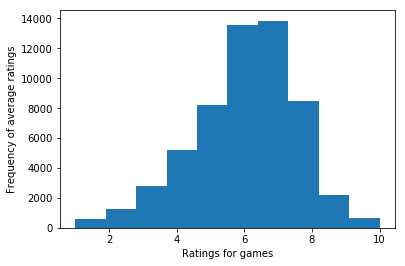

In [8]:
games = games[games["users_rated"] > 0]

games = games.dropna(axis=0)

plt.hist(games["average_rating"])
plt.xlabel("Ratings for games")
plt.ylabel("Frequency of average ratings")
plt.show()

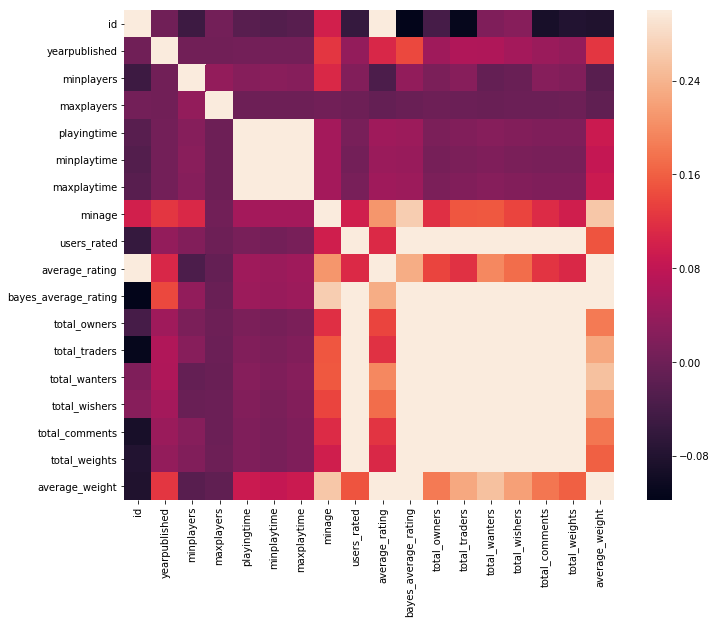

In [9]:
corrmat = games.corr()

figure = plt.figure(figsize=(12,9))
sns.heatmap(corrmat , vmax= 0.3 , square=True)
plt.show()

As we can observe, game type and ID attributes are won't much worth but they are highly correlated

In [10]:
X = games.iloc[: , 3:18].values
y = games.iloc[: , 19:20].values

Splitting datasets now for model input.

In [11]:
from sklearn.cross_validation import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

C:\Users\Viraj Pawar\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Let's build linear regression model now.

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
regressor.predict(x_test)

array([[ 2.58014257],
       [ 2.12569128],
       [ 0.92907874],
       ..., 
       [ 0.87767713],
       [ 1.88000205],
       [ 1.89639667]])

In [14]:
regressor.score(x_test,y_test) * 100

29.79900795017101

# Let's experiment backward elimination of features.

In [15]:
import statsmodels.formula.api as sm

In [16]:
X = np.append(values=X , arr = np.ones((len(X),1)).astype(int) , axis=1)

In [17]:
X_opt = X [: , 3:18]

In [18]:
X_opt = X[: , [10,11,12,15]]

In [19]:
regressor_OLS = sm.OLS(y,X_opt).fit()

In [20]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                 1.135e+04
Date:                Sat, 19 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:25:51   Log-Likelihood:                -96095.
No. Observations:               56894   AIC:                         1.922e+05
Df Residuals:                   56890   BIC:                         1.922e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3722      0.002    180.811      0.000       0.368       0.376
x2          1.639e-05   1.03e-05      1.592      0.111   -3.79e-06    3.66e-05
x3             0.0015      0.000      6.246      0.000       0.001       0.002
x4            -0.0003   5.88e-05     -4.948      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     8604.338   Durbin-Watson:                   1.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13254.616
Skew:                           1.085   Prob(JB):                         0.00
Kurtosis:                       3.937   Cond. No.                         696.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#Optimal set of features
X_opt = X[: , [4,6,7,8,9,10,11,12,13,15] ]

regressor_OLS = sm.OLS(y,X_opt).fit()

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                 1.274e+04
Date:                Sat, 19 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:25:51   Log-Likelihood:                -81381.
No. Observations:               56894   AIC:                         1.628e+05
Df Residuals:                   56885   BIC:                         1.629e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8.389e-05   5.23e-06     16.037      0.000    7.36e-05    9.41e-05
x2          8.389e-05   5.23e-06     16.037      0.000    7.36e-05    9.41e-05
x3             0.0211      0.001     23.593      0.000       0.019       0.023
x4            -0.0002   2.63e-05     -8.864      0.000      -0.000      -0.000
x5             0.1338      0.001    103.472      0.000       0.131       0.136
x6             0.1721      0.002     84.564      0.000       0.168       0.176
x7          7.776e-05    1.3e-05      5.968      0.000    5.22e-05       0.000
x8             0.0007      0.000      3.152      0.002       0.000       0.001
x9             0.0013   8.91e-05     14.970      0.000       0.001       0.002
x10            0.0003   7.94e-05      3.438      0.001       0.000       0.000
==============================================================================
Omnibus:                     6417.139   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9168.431
Skew:                           0.873   Prob(JB):                         0.00
Kurtosis:                       3.907   Cond. No.                     3.96e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.93e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
X_train , X_Test , y_train , y_test = train_test_split(X_opt,y,test_size=0.2,random_state=1)

In [23]:
regressor1 = LinearRegression()
regressor1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
accuracy = regressor1.score(X_Test,y_test)
print(accuracy * 100)

31.1499432669


In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=140,random_state=0,n_jobs=-1)


regressor.fit(x_train,y_train)

C:\Users\Viraj Pawar\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=140, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
regressor.score(x_train,y_train) * 100

93.443405524230315

In [28]:
regressor.score(x_test,y_test) * 100

53.981008144027498

In [ ]:
from sklearn.svm import SVR
svr1 = SVR(kernel='poly')

svr1.fit(X_train,y_train)

C:\Users\Viraj Pawar\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svr1.score(X_train,y_train) * 100

In [ ]:
svr1.score(X_Test,y_test) * 100

In [ ]:
5:28 pm started!
6:30 
    
9:23 pm started again!